In [88]:
import tensorflow as tf
import numpy as np


In [89]:
def generate_data(xlim, ylim, n_point_per_axis, lenth_per_slab, width_per_slab, gap_to_edge_1, gap_to_edge_2, n_slab1, n_slab2):
    # We consider the top left point of each slab, then simulated them accordingly.
    top_class_1 = [xlim[0] + gap_to_edge_1[0], ylim[1] - gap_to_edge_1[1]]
#     print(top_class_1)
    bottom_class_1 = [xlim[0] + gap_to_edge_1[0], ylim[0] + gap_to_edge_1[1]+width_per_slab]
#     print(bottom_class_1)
    topleftpoint_class_1 = np.linspace(top_class_1, bottom_class_1, n_slab1)
#     print(np.shape(topleftpoint_class_1))
    X = []
    for i in range(len(topleftpoint_class_1)):
        x = np.linspace(topleftpoint_class_1[i,0], topleftpoint_class_1[i,0]+lenth_per_slab, n_point_per_axis[0])
        y = np.linspace(topleftpoint_class_1[i,1], topleftpoint_class_1[i,1]-width_per_slab, n_point_per_axis[1])
        xx,yy = np.meshgrid(x,y)
#         print(np.shape(x))
#         print(np.shape(xx))
        X.append(np.stack((xx,yy),axis = -1))
    Y1 = np.zeros(n_point_per_axis[0]*n_point_per_axis[1]*n_slab1)
    
    # We consider the top right point of each slab, then simulated them accordingly.

    top_class_2 = [xlim[1] - gap_to_edge_2[0], ylim[1] - gap_to_edge_2[1]]
    bottom_class_2 = [xlim[1] - gap_to_edge_2[0], ylim[0] + gap_to_edge_2[1]+width_per_slab]
    toprightpoint_class_2 = np.linspace(top_class_2, bottom_class_2, n_slab2)
    for i in range(len(toprightpoint_class_2)):
        x = np.linspace(toprightpoint_class_2[i,0], toprightpoint_class_2[i,0]-lenth_per_slab, n_point_per_axis[0])
        y = np.linspace(toprightpoint_class_2[i,1], toprightpoint_class_2[i,1]-width_per_slab, n_point_per_axis[1])
        xx,yy = np.meshgrid(x,y)
        X.append(np.stack((xx,yy),axis = -1))
    X = np.reshape(X,[-1,2])
    Y2 = np.ones(n_point_per_axis[0]*n_point_per_axis[1]*n_slab2)
    Y = np.concatenate((Y1,Y2),axis = -1)
    return X,Y

In [86]:
# X,Y = generate_data(
#     xlim = [-1,1],
#     ylim = [-1,1], 
#     n_point_per_axis = [20,10], 
#     lenth_per_slab = 0.4, 
#     width_per_slab = 0.2, 
#     gap_to_edge_1 = [0.1,0.15],
#     gap_to_edge_2 = [0.1, 0.5],
#     n_slab1 = 3, 
#     n_slab2 = 2,
# )


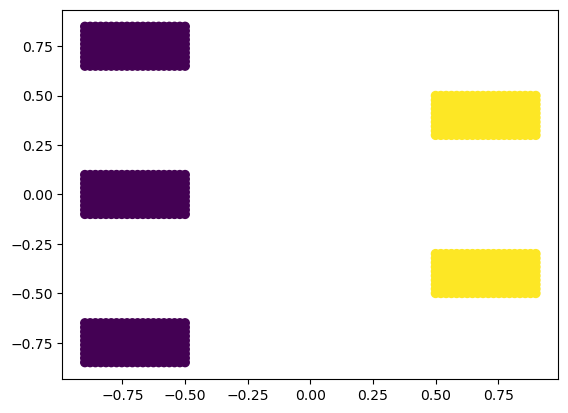

In [87]:
# plt.scatter(X[:,0],X[:,1], c=Y)

In [90]:
def draw_prediction(model,xlim,ylim,num):
    x = np.linspace(xlim[0],xlim[1],num[0])
    y = np.linspace(ylim[0],ylim[1],num[1])
    xx, yy = np.meshgrid(x,y)
    X = np.reshape(np.stack((xx,yy),axis = -1),[-1,2])
    return model(X)